In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
from statistics import harmonic_mean

In [2]:
FMA_LARGE_CSV = '/scratch/ci411/rap_data/fma_large_pitchcontour.csv'
fma_large_df = pd.read_csv(FMA_LARGE_CSV).drop(labels='Unnamed: 0', axis=1)
print(fma_large_df.columns)

TRACK_CSV = '/scratch/work/sonyc/marl/private_datasets/FMA/fma_metadata/fma_metadata/raw_tracks.csv'
track_df = pd.read_csv(TRACK_CSV)
print(track_df.columns)


Index(['track_id', 'cref_recall', 'cref_false_alarm', 'cref_pitch_acc',
       'cref_chroma_acc', 'cref_overall_acc', 'pref_recall',
       'pref_false_alarm', 'pref_pitch_acc', 'pref_chroma_acc',
       'pref_overall_acc'],
      dtype='object')
Index(['track_id', 'album_id', 'album_title', 'album_url', 'artist_id',
       'artist_name', 'artist_url', 'artist_website', 'license_image_file',
       'license_image_file_large', 'license_parent_id', 'license_title',
       'license_url', 'tags', 'track_bit_rate', 'track_comments',
       'track_composer', 'track_copyright_c', 'track_copyright_p',
       'track_date_created', 'track_date_recorded', 'track_disc_number',
       'track_duration', 'track_explicit', 'track_explicit_notes',
       'track_favorites', 'track_file', 'track_genres', 'track_image_file',
       'track_information', 'track_instrumental', 'track_interest',
       'track_language_code', 'track_listens', 'track_lyricist',
       'track_number', 'track_publisher', 'track_t

In [3]:
fma_large_df

,track_id,cref_recall,cref_false_alarm,cref_pitch_acc,cref_chroma_acc,cref_overall_acc,pref_recall,pref_false_alarm,pref_pitch_acc,pref_chroma_acc,pref_overall_acc
0,32657,0.558164,0.0,0.463180,0.463180,0.463180,0.527809,0.0,0.654938,0.654938,0.435868
1,80367,0.915498,0.0,0.866995,0.866995,0.866995,0.933692,0.0,0.925179,0.925179,0.891129
2,141164,0.801505,0.0,0.671296,0.671296,0.671296,0.801967,0.0,0.750164,0.750820,0.660984
3,86601,0.852981,0.0,0.390244,0.390244,0.390244,0.565940,0.0,0.343718,0.343718,0.259086
4,68956,0.540785,0.0,0.453172,0.453172,0.453172,0.107477,0.0,0.391188,0.391856,0.093458
...,...,...,...,...,...,...,...,...,...,...,...
106405,109622,0.274838,0.0,0.215413,0.216342,0.215413,0.760736,0.0,0.766871,0.773006,0.631902
106406,70167,0.640132,0.0,0.474342,0.474342,0.474342,0.670579,0.0,0.646322,0.647105,0.504695
106407,42051,0.957779,0.0,0.760746,0.760746,0.760746,0.898137,0.0,0.746170,0.746170,0.708903
106408,47734,0.002963,0.0,0.002963,0.002963,0.002963,0.006173,0.0,0.444444,0.487654,0.006173


In [4]:
joined_df = fma_large_df.merge(track_df, on='track_id', how='left')

In [5]:
print(joined_df.columns)
joined_df.describe()

Index(['track_id', 'cref_recall', 'cref_false_alarm', 'cref_pitch_acc',
       'cref_chroma_acc', 'cref_overall_acc', 'pref_recall',
       'pref_false_alarm', 'pref_pitch_acc', 'pref_chroma_acc',
       'pref_overall_acc', 'album_id', 'album_title', 'album_url', 'artist_id',
       'artist_name', 'artist_url', 'artist_website', 'license_image_file',
       'license_image_file_large', 'license_parent_id', 'license_title',
       'license_url', 'tags', 'track_bit_rate', 'track_comments',
       'track_composer', 'track_copyright_c', 'track_copyright_p',
       'track_date_created', 'track_date_recorded', 'track_disc_number',
       'track_duration', 'track_explicit', 'track_explicit_notes',
       'track_favorites', 'track_file', 'track_genres', 'track_image_file',
       'track_information', 'track_instrumental', 'track_interest',
       'track_language_code', 'track_listens', 'track_lyricist',
       'track_number', 'track_publisher', 'track_title', 'track_url'],
      dtype='object')

,track_id,cref_recall,cref_false_alarm,cref_pitch_acc,cref_chroma_acc,cref_overall_acc,pref_recall,pref_false_alarm,pref_pitch_acc,pref_chroma_acc,...,artist_id,license_parent_id,track_bit_rate,track_comments,track_disc_number,track_favorites,track_instrumental,track_interest,track_listens,track_number
count,106410.000000,106243.000000,106243.0,106243.000000,106243.000000,106243.000000,105846.000000,105846.0,105846.000000,105846.000000,...,106410.000000,83117.000000,106306.000000,106410.000000,106410.000000,106410.000000,106410.000000,1.064100e+05,106410.000000,106410.000000
mean,79422.851208,0.671718,0.0,0.538631,0.538970,0.538631,0.620318,0.0,0.644978,0.647435,...,12035.740081,5.219558,263663.539574,0.031623,1.012170,3.183629,0.056762,3.541254e+03,2328.809181,8.261893
std,44700.795906,0.250395,0.0,0.235716,0.235579,0.235716,0.252208,0.0,0.199521,0.197190,...,6882.716828,1.354783,66965.110451,0.322170,0.148078,13.521478,0.231388,1.902895e+04,8028.849498,15.252283
min,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,2.000000,192.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,40814.250000,0.561290,0.0,0.405148,0.405748,0.405148,0.472994,0.0,0.536844,0.539404,...,6443.000000,5.000000,192000.000000,0.000000,1.000000,0.000000,0.000000,5.990000e+02,291.000000,2.000000
50%,78835.500000,0.754832,0.0,0.578484,0.578799,0.578484,0.690476,0.0,0.671195,0.672613,...,12030.000000,5.000000,305743.500000,0.000000,1.000000,1.000000,0.000000,1.313500e+03,763.000000,5.000000
75%,119406.750000,0.857043,0.0,0.713374,0.713583,0.713374,0.817916,0.0,0.788583,0.789633,...,18013.000000,6.000000,320000.000000,0.000000,1.000000,3.000000,0.000000,3.060000e+03,2019.000000,9.000000
max,155320.000000,0.999666,0.0,0.999666,0.999666,0.999666,0.999216,0.0,1.000000,1.000000,...,24357.000000,10.000000,448000.000000,37.000000,5.000000,1482.000000,1.000000,3.293557e+06,543252.000000,255.000000


In [6]:
fma_large_df.columns

Index(['track_id', 'cref_recall', 'cref_false_alarm', 'cref_pitch_acc',
       'cref_chroma_acc', 'cref_overall_acc', 'pref_recall',
       'pref_false_alarm', 'pref_pitch_acc', 'pref_chroma_acc',
       'pref_overall_acc'],
      dtype='object')

In [7]:
metric_columns = ['cref_recall', 'cref_pitch_acc', 'cref_chroma_acc',\
           'cref_overall_acc', 'pref_recall', 'pref_pitch_acc',\
           'pref_chroma_acc','pref_overall_acc']

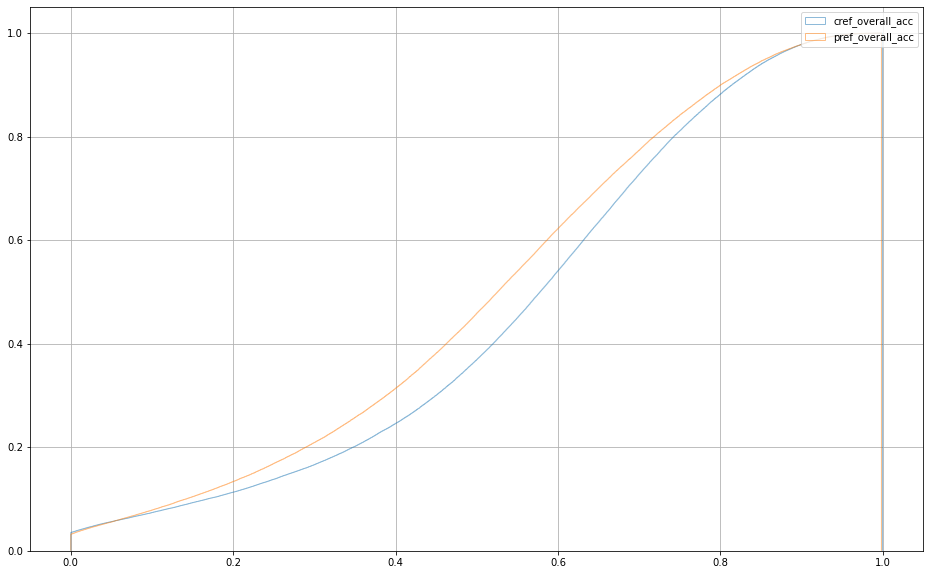

In [8]:
fig = plt.figure(figsize=(16,10))

for column in ['cref_overall_acc', 'pref_overall_acc']:
    fma_large_df[column].hist(bins=1000, alpha=0.5, density=True, stacked=True, label=column, histtype='step', cumulative=True)
    
plt.legend()

In [9]:
fma_large_sampling_df = fma_large_df.copy().dropna()
selection_func = lambda row:harmonic_mean([row['cref_overall_acc'], row['pref_overall_acc']])
fma_large_sampling_df['harmonic_mean'] = fma_large_sampling_df.apply(selection_func, axis=1)

/scratch/ci411/.conda/envs/rap_env/lib/python3.6/statistics.py:356: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(1/x for x in _fail_neg(data, errmsg))


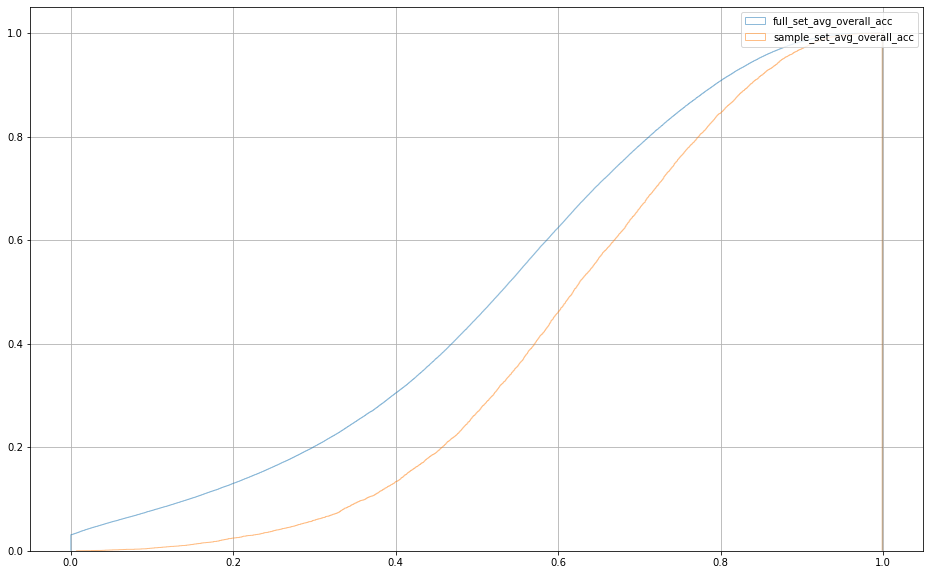

In [10]:
fig = plt.figure(figsize=(16,10))

sample = fma_large_sampling_df.sample(n=10000, weights=fma_large_sampling_df['harmonic_mean'])

fma_large_sampling_df['harmonic_mean'].hist(bins=1000, alpha=.5, density=True, label='full_set_avg_overall_acc', histtype='step', cumulative=True)
sample['harmonic_mean'].hist(bins=1000, alpha=.5, density=True, label='sample_set_avg_overall_acc', histtype='step', cumulative=True)

plt.legend()

<AxesSubplot:>

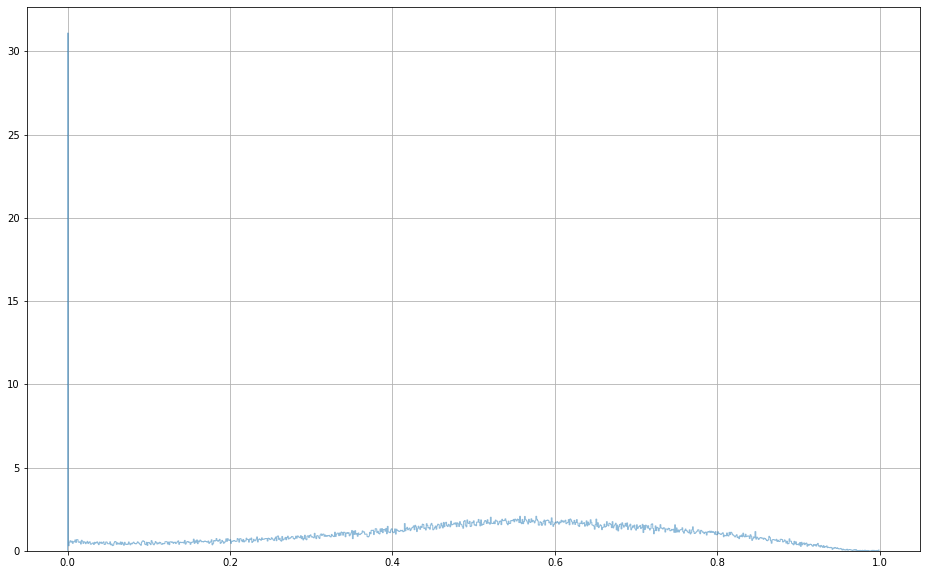

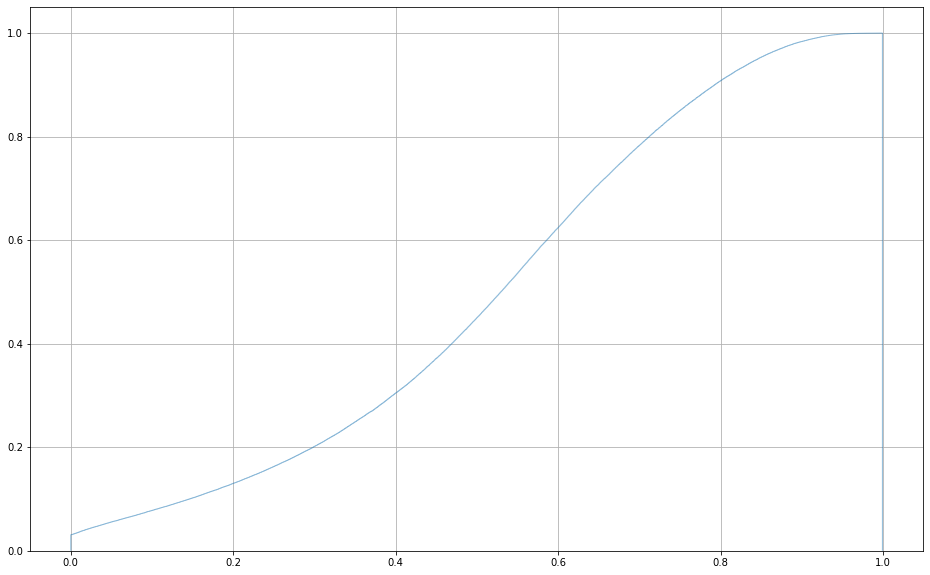

In [11]:
fig = plt.figure(figsize=(16,10))
fma_large_sampling_df['harmonic_mean'].hist(bins=1000, alpha=.5, density=True, histtype='step', label='Empirical PDF', cumulative=False, stacked=True)

fig = plt.figure(figsize=(16,10))
fma_large_sampling_df['harmonic_mean'].hist(bins=1000, alpha=.5, density=True, histtype='step', label='Empirical CDF', cumulative=True, stacked=True)

In [12]:
from scipy.optimize import minimize

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def nonlinear_transform(x, a, b):
    return(sigmoid(x*a+b))

def fit_func(data, n):
    def func(params):
        return(np.sqrt(np.power(sum(sigmoid(params[0]*data+params[1]))-n, 2)))
    return func

In [13]:
example_n = 10000

test_func = fit_func(fma_large_sampling_df['harmonic_mean'].to_numpy(), example_n)
bounds = ((0, None), (None, None))
res = minimize(test_func, [1,1], bounds=bounds)

/scratch/ci411/.conda/envs/rap_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [14]:
a,b = res.x
print(res.x)

[ 1.06842199 -2.81997083]


In [15]:
new_sample = sigmoid(a*fma_large_sampling_df['harmonic_mean'].to_numpy()+b)
print(sum(new_sample > np.random.rand(len(new_sample))))

9996


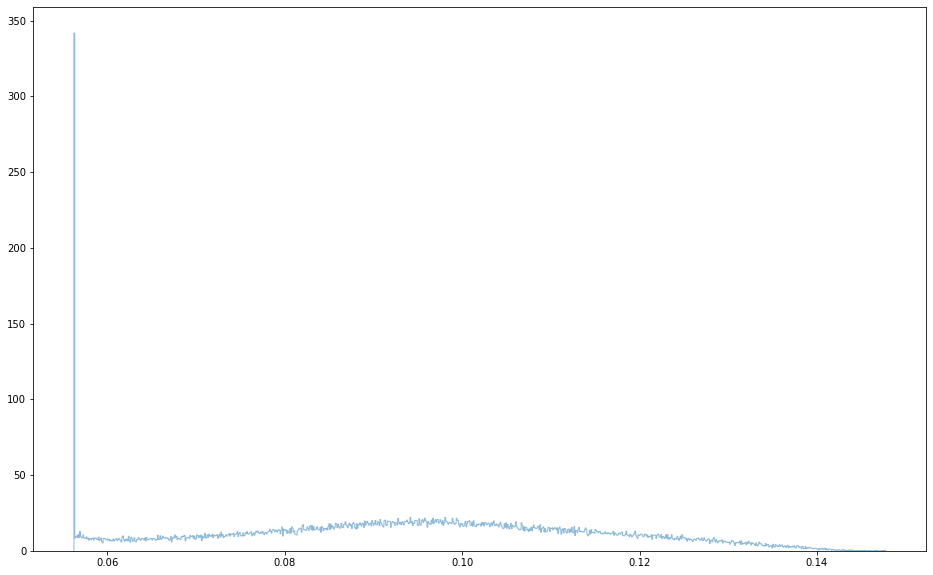

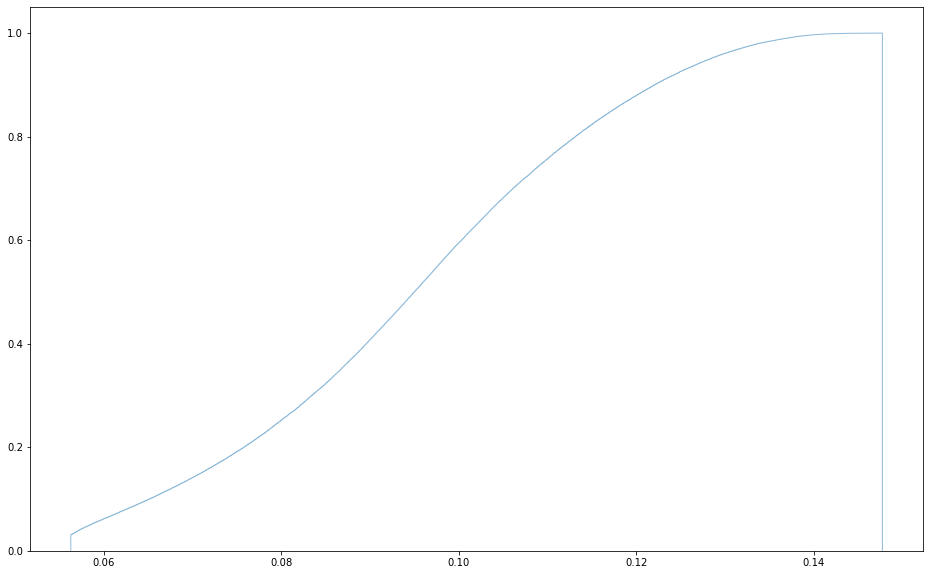

In [16]:
fig = plt.figure(figsize=(16,10))
_ = plt.hist(new_sample, bins=1000, alpha=.5, density=True, histtype='step', label='Empirical PDF', cumulative=False, stacked=True)

fig = plt.figure(figsize=(16,10))
_ = plt.hist(new_sample, bins=1000, alpha=.5, density=True, histtype='step', label='Empirical CDF', cumulative=True, stacked=True)


In [17]:
from tqdm import tqdm
sum_samples = []
draw_samples = lambda sum_samples : sum_samples.append(sum(new_sample > np.random.rand(len(new_sample))))
for _ in tqdm(range(1000)):
    draw_samples(sum_samples)

100%|██████████| 1000/1000 [03:24<00:00,  4.89it/s]


Mean of 1000 Samples = 9997.79, Target = 10000


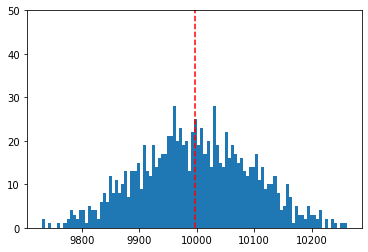

In [18]:
bins = plt.hist(sum_samples, bins=100)
plt.vlines(np.average(sum_samples), 0, 50, colors='r', linestyles='dashed')
plt.ylim(0,50)
print("Mean of 1000 Samples = {:.2f}, Target = {}".format(np.average(sum_samples), example_n))

In [19]:
fma_large_sampling_df['sampling_prob'] = new_sample
full_sampling = fma_large_sampling_df.merge(track_df, on='track_id', how='left')
top_50 = full_sampling.sort_values(by='sampling_prob', ascending=False).head(50)
urls = top_50['track_url'].to_list()  
top_50[['track_title','artist_name']]

,track_title,artist_name
102291,Dissolves In Water,Sick To The Back Teeth
49463,Dividindo a mesma reta com um ponto sem você p...,Filipe Guimarães
104087,tone,etc.
40701,tone,etc.
62016,Cornicis,Limited Liability Sounds
32373,bleib gesund,Inox Kapell
798,Zuider Zee,Jenny Dalton remixed by Lee Rosevere
47296,Quasar,Elizabeth Veldon
99499,Unicorns,Drums Like Machine Guns
32442,Pulsar,Latki


In [20]:
top_50.apply(lambda row : eval(row['track_genres']), axis=1)\
      .explode('track_genres')\
      .apply(lambda row: row['genre_title'])\
      .value_counts()

Experimental          20
Electronic            11
Folk                   7
Noise                  7
Improv                 5
Ambient                4
Avant-Garde            4
Field Recordings       4
Electroacoustic        4
Ambient Electronic     4
Minimalism             3
Drone                  3
Hip-Hop                3
Techno                 3
Musique Concrete       3
Singer-Songwriter      3
Soundtrack             2
Instrumental           2
International          2
Balkan                 2
Europe                 2
IDM                    1
Experimental Pop       1
Downtempo              1
Progressive            1
Spoken Word            1
Sound Art              1
Pop                    1
Psych-Folk             1
Industrial             1
No Wave                1
Lo-Fi                  1
Post-Punk              1
Free-Jazz              1
Hip-Hop Beats          1
Spoken Weird           1
Rock                   1
Unclassifiable         1
dtype: int64

<AxesSubplot:>

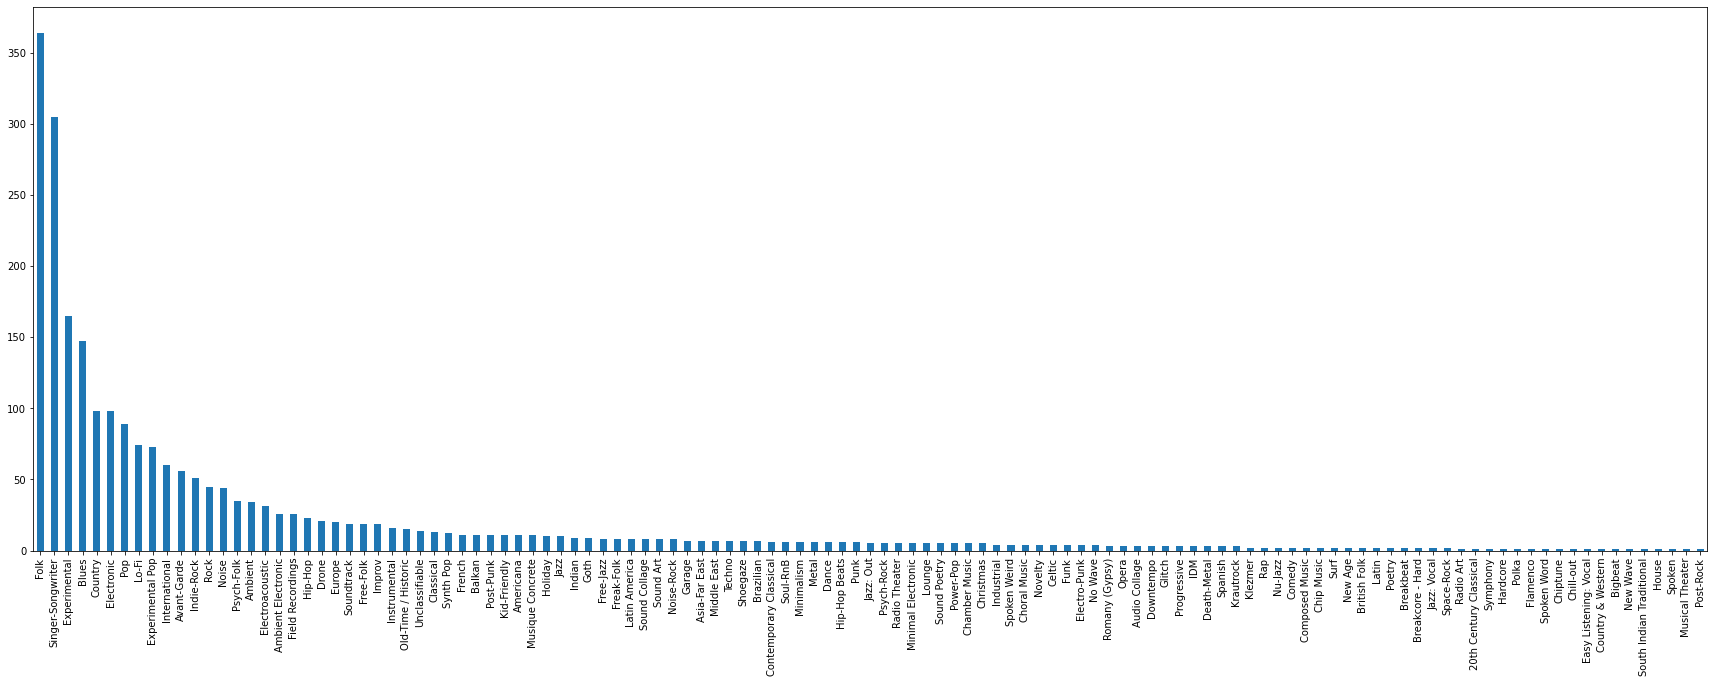

In [21]:
fig = plt.figure(figsize=(30,10))

top_1k_genres = full_sampling.sort_values(by='sampling_prob', ascending=False)['track_genres'].head(1000)
top_1k_genres.map(lambda row: eval(str(row)))\
             .explode('track_genres')\
             .dropna()\
             .map(lambda row: row['genre_title'])\
             .value_counts()\
             .plot.bar()

In [22]:
joined_df

,track_id,cref_recall,cref_false_alarm,cref_pitch_acc,cref_chroma_acc,cref_overall_acc,pref_recall,pref_false_alarm,pref_pitch_acc,pref_chroma_acc,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
0,32657,0.558164,0.0,0.463180,0.463180,0.463180,0.527809,0.0,0.654938,0.654938,...,NaN,0,260,NaN,148,NaN,13,NaN,Why,http://freemusicarchive.org/music/Fidel_Cutstr...
1,80367,0.915498,0.0,0.866995,0.866995,0.866995,0.933692,0.0,0.925179,0.925179,...,NaN,0,319,NaN,251,NaN,3,NaN,Balkan Duj / Nasvalo Sijum,http://freemusicarchive.org/music/Raklorom/Liv...
2,141164,0.801505,0.0,0.671296,0.671296,0.671296,0.801967,0.0,0.750164,0.750820,...,NaN,0,4504,NaN,1378,NaN,8,NaN,08 BEATEN TRACK,http://freemusicarchive.org/music/godmanwho/Bi...
3,86601,0.852981,0.0,0.390244,0.390244,0.390244,0.565940,0.0,0.343718,0.343718,...,NaN,0,569,NaN,301,NaN,1,NaN,Thread Pulls Live at FoEG,http://freemusicarchive.org/music/Thread_Pulls...
4,68956,0.540785,0.0,0.453172,0.453172,0.453172,0.107477,0.0,0.391188,0.391856,...,NaN,0,1661,NaN,1153,NaN,14,NaN,The Knight From The Spectrum Game,http://freemusicarchive.org/music/Stealing_Orc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106405,109622,0.274838,0.0,0.215413,0.216342,0.215413,0.760736,0.0,0.766871,0.773006,...,NaN,0,691,NaN,241,NaN,2,NaN,Copula,http://freemusicarchive.org/music/Diogenes_In_...
106406,70167,0.640132,0.0,0.474342,0.474342,0.474342,0.670579,0.0,0.646322,0.647105,...,NaN,0,530,NaN,208,NaN,8,NaN,Sligo River Offering,http://freemusicarchive.org/music/Mudang_Rouge...
106407,42051,0.957779,0.0,0.760746,0.760746,0.760746,0.898137,0.0,0.746170,0.746170,...,NaN,0,7582,NaN,3779,NaN,11,NaN,A Craftier Thief,http://freemusicarchive.org/music/Architect_25...
106408,47734,0.002963,0.0,0.002963,0.002963,0.002963,0.006173,0.0,0.444444,0.487654,...,NaN,0,3694,NaN,2525,NaN,3,NaN,dan4,http://freemusicarchive.org/music/junior85/Our...


In [24]:
top_1k_genres

102291    [{'genre_id': '12', 'genre_title': 'Rock', 'ge...
49463     [{'genre_id': '27', 'genre_title': 'Lo-Fi', 'g...
104087    [{'genre_id': '15', 'genre_title': 'Electronic...
40701     [{'genre_id': '10', 'genre_title': 'Pop', 'gen...
62016     [{'genre_id': '32', 'genre_title': 'Noise', 'g...
                                ...                        
55062     [{'genre_id': '103', 'genre_title': 'Singer-So...
46048     [{'genre_id': '3', 'genre_title': 'Blues', 'ge...
58486     [{'genre_id': '177', 'genre_title': 'Celtic', ...
61294     [{'genre_id': '10', 'genre_title': 'Pop', 'gen...
55254     [{'genre_id': '10', 'genre_title': 'Pop', 'gen...
Name: track_genres, Length: 1000, dtype: object

In [ ]:
top_1k_genres.where()